# GNPS2 API

The documentation is [here](https://ccms-ucsd.github.io/GNPSDocumentation/api/).

In [5]:
import pandas as pd
import requests
import io
import json

Single Library Spectrum

In [4]:
requests.get('https://metabolomics-usi.gnps2.org/json/?usi1=mzspec%3AGNPS%3AGNPS-LIBRARY%3Aaccession%3ACCMSLIB00000579622').text

'{"n_peaks":8,"peaks":[[80.97339630126953,955969.8125],[81.98159790039062,542119.1875],[98.98410034179688,483893632.0],[116.99469757080078,1605324.25],[127.0155029296875,182958080.0],[131.01019287109375,878951.375],[155.0467071533203,73527152.0],[183.07809448242188,16294011.0]],"precursor_charge":1,"precursor_mz":183.078,"splash":"splash10-0002-9500000000-fe91737b5df956c7e69e"}\n'

In [6]:
json_str = requests.get('https://metabolomics-usi.gnps2.org/json/?usi1=mzspec%3AGNPS%3AGNPS-LIBRARY%3Aaccession%3ACCMSLIB00000579622').text
json.loads(json_str)

{'n_peaks': 8,
 'peaks': [[80.97339630126953, 955969.8125],
  [81.98159790039062, 542119.1875],
  [98.98410034179688, 483893632.0],
  [116.99469757080078, 1605324.25],
  [127.0155029296875, 182958080.0],
  [131.01019287109375, 878951.375],
  [155.0467071533203, 73527152.0],
  [183.07809448242188, 16294011.0]],
 'precursor_charge': 1,
 'precursor_mz': 183.078,
 'splash': 'splash10-0002-9500000000-fe91737b5df956c7e69e'}

Conversion to Smiles/InChI/InChIKey

In [8]:
requests.get('https://structure.gnps2.org/smiles?inchi=InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3').text

'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

In [9]:
requests.get('https://structure.gnps2.org/inchi?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O').text

'InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3'

In [10]:
requests.get('https://structure.gnps2.org/inchikey?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O').text

'RYYVLZVUVIJVGH-UHFFFAOYSA-N'

Conversion to fingerprint/exact mass/Adduct m/z/formula

In [11]:
requests.get('https://structure.gnps2.org/structurefingerprint?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O').text

'10000000000000000000000000000000010000000000000000001000000000000000000000000000000000000000000000000000000000000000000001000000000000000010000000000000000000001000000000000000000100000000000000000000000000000000000000000000000000000010000000000000000000000001000000000000000000000001000000000000000000000000000000100000000000000010000001000000000000000000100000000000000000000010000001000000000000001000000000000000100010010000100000000000000000000000000000000001000000000000000000000000000001000000000010000000'

In [13]:
requests.get('https://structure.gnps2.org/adductcalc?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O&mz=195.08765155999998').text

'[{"adduct": "M", "mz": 194.08037556, "charge": 0, "delta": 1.0072759999999903}, {"adduct": "M+H", "mz": 195.08765155999998, "charge": 1, "delta": 0.0}, {"adduct": "M+Na", "mz": 217.06959356, "charge": 1, "delta": -21.981942000000004}, {"adduct": "M+K", "mz": 233.04353356, "charge": 1, "delta": -37.955882}, {"adduct": "M+NH4", "mz": 212.11419856, "charge": 1, "delta": -17.026547000000022}, {"adduct": "M-H", "mz": 193.07309956, "charge": -1, "delta": 2.0145519999999806}, {"adduct": "M+Br", "mz": 272.99926056, "charge": 1, "delta": -77.911609}, {"adduct": "M+Cl", "mz": 229.04977756, "charge": 1, "delta": -33.96212600000001}]'

In [15]:
requests.get('https://structure.gnps2.org/formula?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O').text

'C8H10N4O2'

Structure Natural Product Classifier (NP Classifier)

In [19]:
requests.get('https://npclassifier.gnps2.org/classify?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O').text

'{"class_results": ["Purine alkaloids"], "superclass_results": ["Pseudoalkaloids"], "pathway_results": ["Alkaloids"], "isglycoside": false}'

Structure Image

In [20]:
requests.get('https://structure.gnps2.org/structureimg?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O')

<Response [200]>

In [21]:
response = requests.get('https://structure.gnps2.org/structureimg?smiles=Cn1c(=O)c2c(ncn2C)n(C)c1=O')

In [22]:
if response.status_code == 200:
    with open('structure.png', 'wb') as file:
        file.write(response.content)

In [26]:
from IPython.display import Image, display

def plot(data):
    display(
    Image(
        data=data,
        width=800
        )
    )
#@disk_cache()
def fetch_single_spectrum_image(spectrum):
    try:
        url = f"https://metabolomics-usi.gnps2.org/png/?usi1=mzspec:GNPS:GNPS-LIBRARY:accession:{spectrum}"
        response = requests.get(url)
        response.raise_for_status() 
        if response.headers.get('Content-Type') != 'image/png':
            raise ValueError("Response is not a PNG image")
        return response.content
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

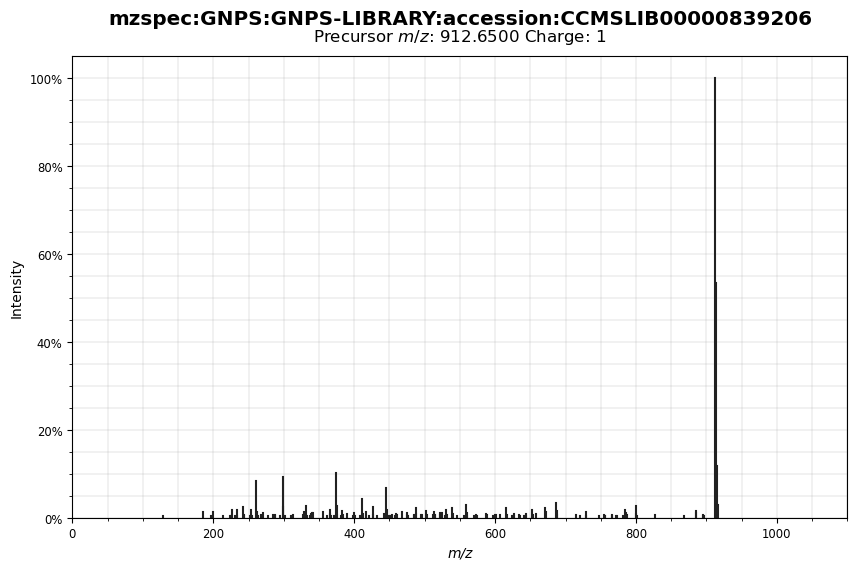

In [27]:
response = fetch_single_spectrum_image('CCMSLIB00000839206')
if response:
    a = Image(data=response, width=800)
    display(a)

Structure Similarity

In [23]:
requests.get('https://structure.gnps2.org/structuresimilarity?smiles1=Cn1c(=O)c2c(ncn2C)n(C)c1=O&smiles2=Cn1c(=O)c2c(ncn2C)n(C)c1=O').text

'1.0'

ModiFinder

Some functions of the ModiFinder visualizer module are accessible via APIs. For details on the parameters you can pass to these functions, refer to the GitHub repository or the [documentation](https://wang-bioinformatics-lab.github.io/ModiFinder_base/modifinder/drawing.html#).

In [29]:
#@disk_cache()
def fetch_modifinder_alignment(spectrum1, spectrum2, matches='default'):
    try:
        url = f"https://modifinder.gnps2.org/api/visualizer/draw_alignment?spectrums=[%22{spectrum1}%22,%22{spectrum2}%22]&matches={matches}.png"
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        return response.content
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

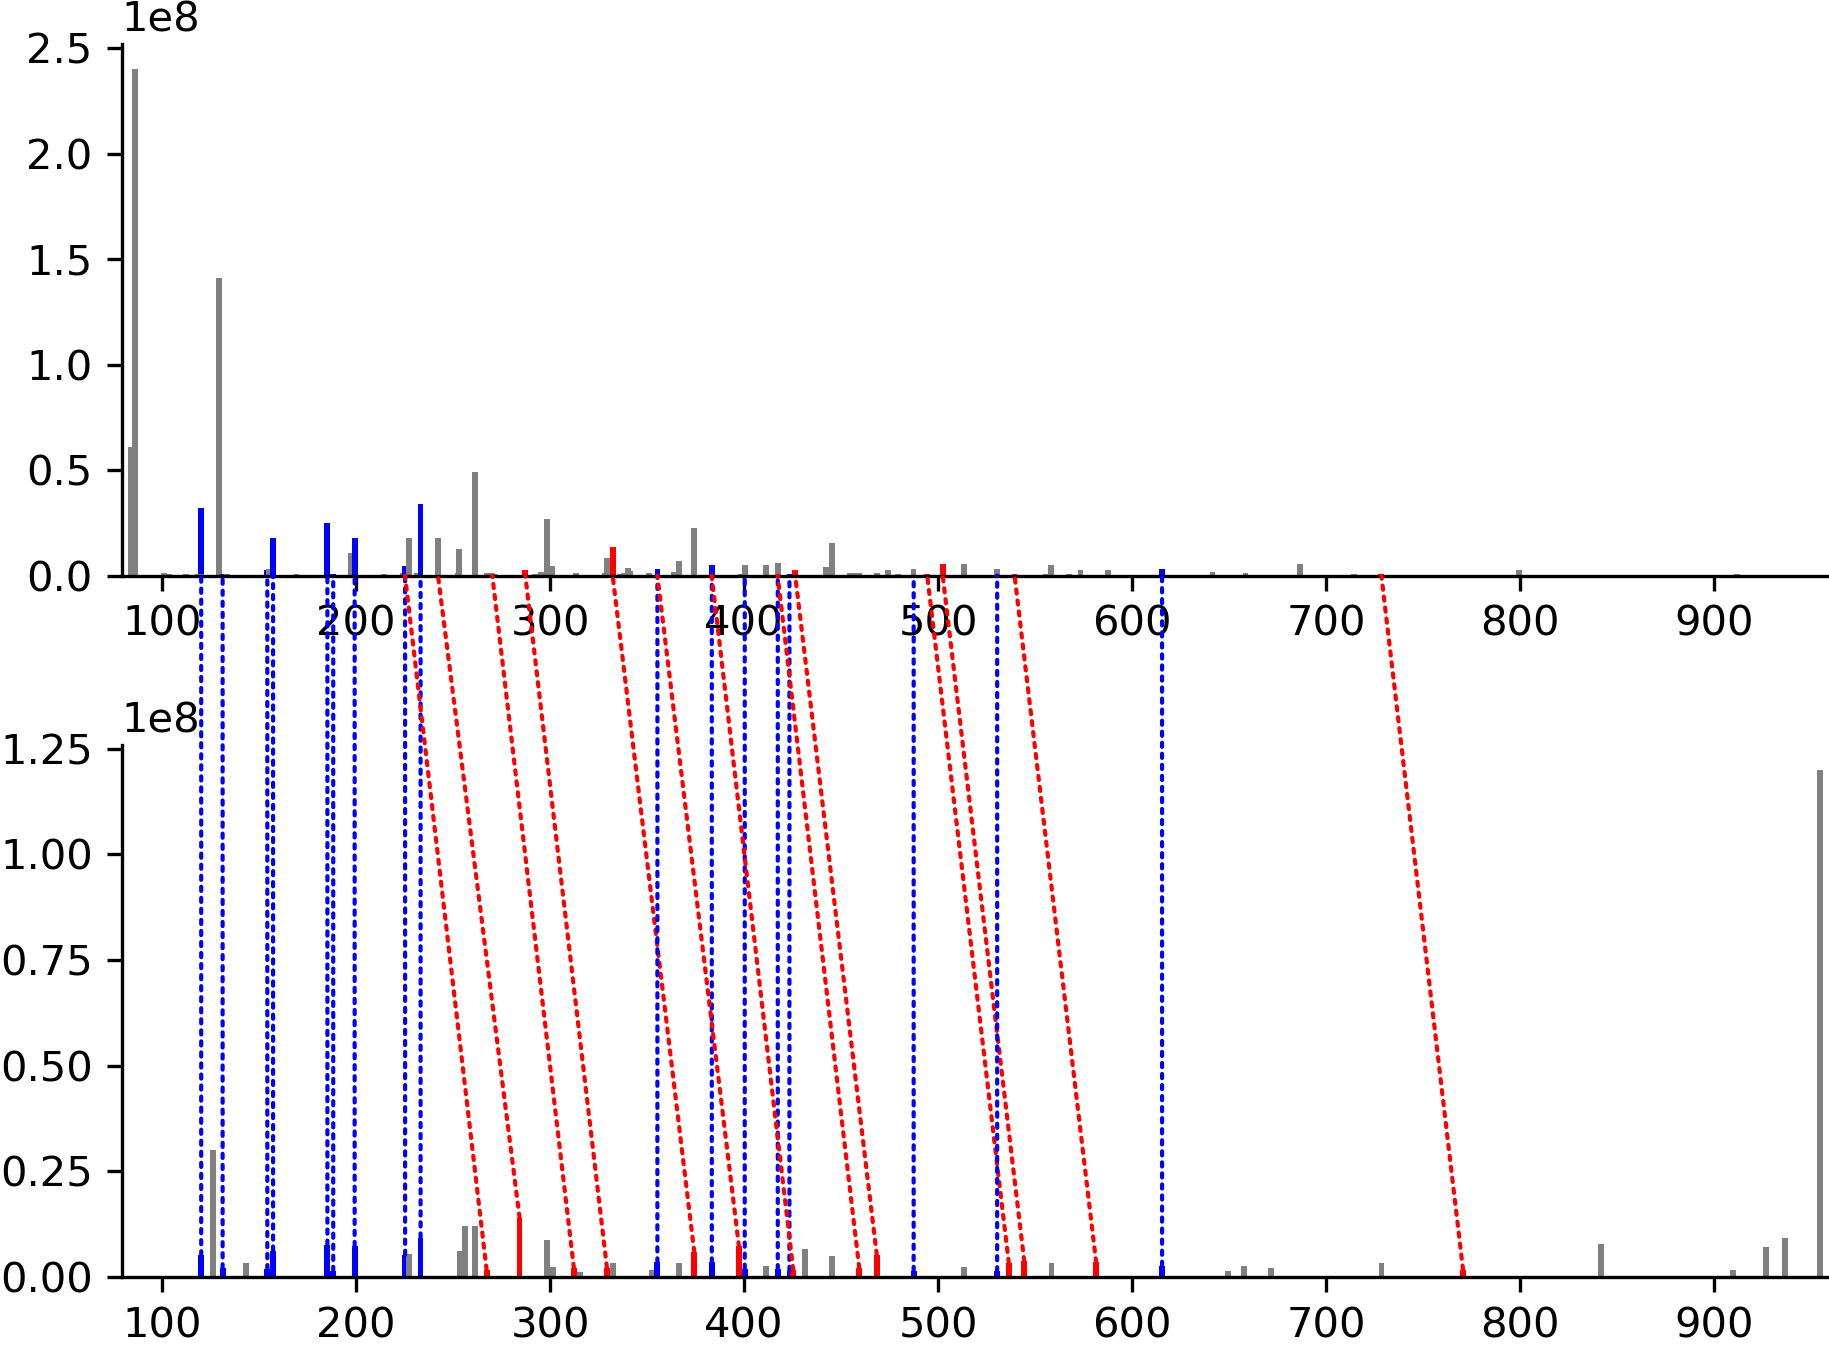

In [30]:
display(
    Image(
        data=fetch_modifinder_alignment("CCMSLIB00000579271", "CCMSLIB00012471599", matches='default'),
        width=500
        )
)

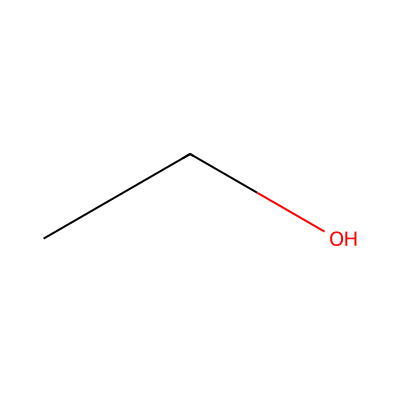

In [39]:
response = requests.get('https://modifinder.gnps2.org/api/visualizer/draw_molecule?mol=CCO.png').content
if response:
    a = Image(data=response, width=200)
    display(a)

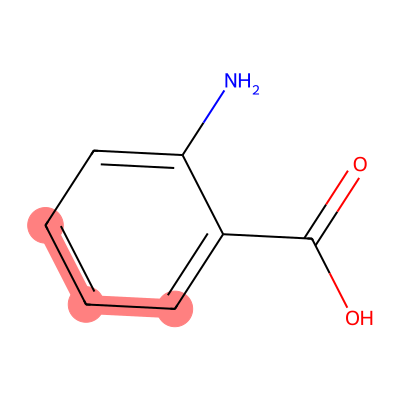

In [38]:
response = requests.get('https://modifinder.gnps2.org/api/visualizer/draw_molecule?mol=CCMSLIB00010102097&size=400,400&highlightAtoms=0,1,5.png').content
if response:
    a = Image(data=response, width=400)
    display(a)

In [41]:
response = requests.get('https://modifinder.gnps2.org/api/visualizer/draw_modifications?mol1=CCMSLIB00010101989&mol2=CCMSLIB00010102097.png').content
if response:
    a = Image(data=response, width=800)
    display(a)

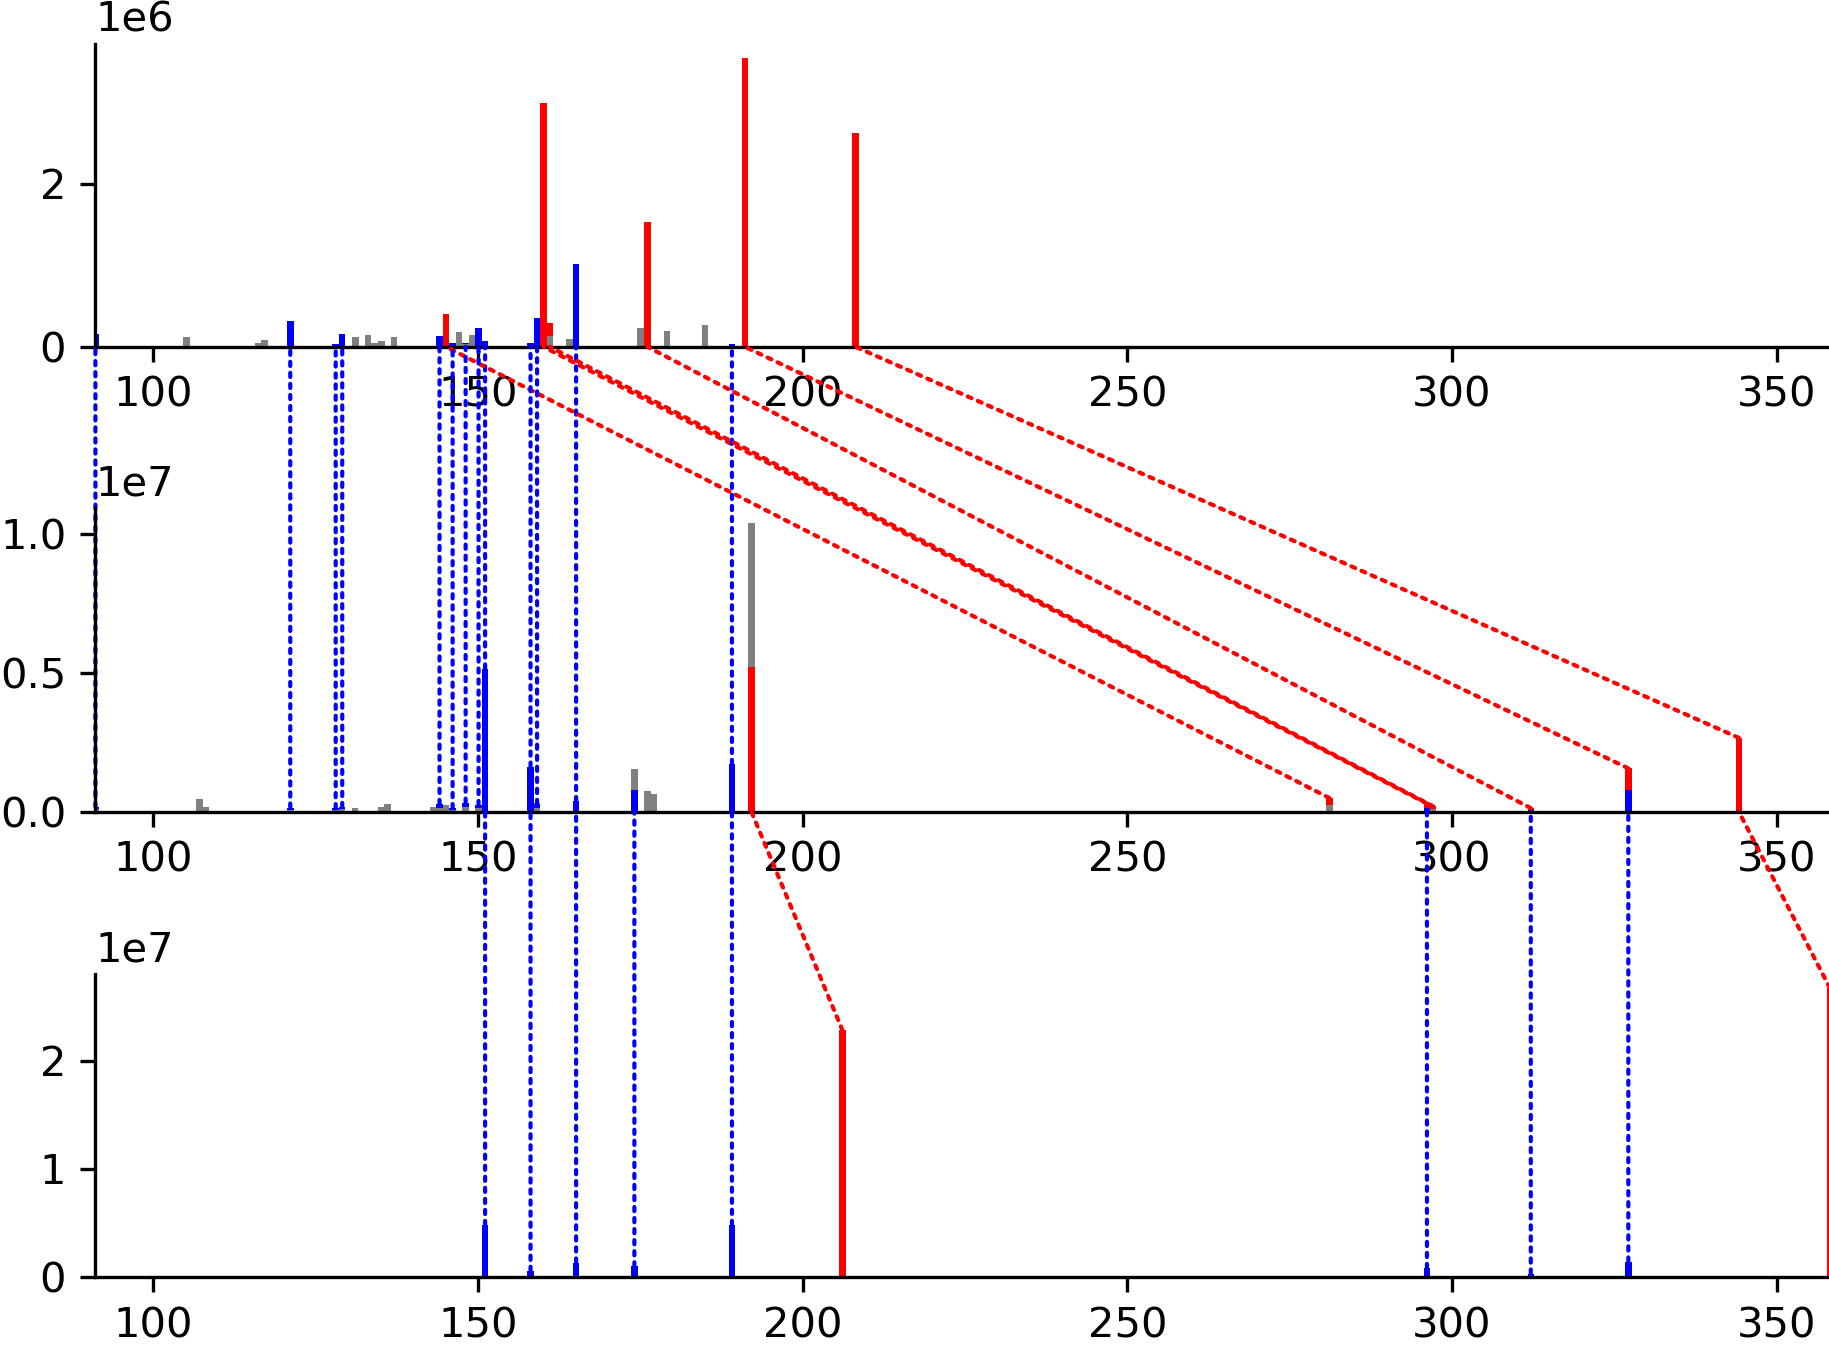

In [42]:
response = requests.get('https://modifinder.gnps2.org/api/visualizer/draw_alignment?spectrums=[%22CCMSLIB00010118942%22,%22CCMSLIB00010118185%22,%22CCMSLIB00010104042%22]&matches=default&ratio_to_base_peak=0.01&bar_width=1.png').content
if response:
    a = Image(data=response, width=400)
    display(a)

[fast search](https://wang-bioinformatics-lab.github.io/GNPS2_Documentation/api/#fast-search)

In [31]:
r = requests.get("https://fasst.gnps2.org/search?library=gnpsdata_index&usi=mzspec:GNPS:GNPS-LIBRARY:accession:CCMSLIB00000579271")

In [32]:
r.json().keys()

dict_keys(['results', 'timing', 'grouped_by_unit_delta_mass', 'grouped_by_dataset', 'grouped_by_dataset_unit_delta', 'metadata_groupings', 'log'])

In [33]:
len(r.json()['results'])

325

In [34]:
r.json()['results'][0]

{'Delta Mass': 0.0,
 'USI': 'mzspec:MSV000082944:library/GNPS-LIBRARY.mgf:scan:3082',
 'Charge': 1,
 'Cosine': 1.0,
 'Matching Peaks': 18,
 'Unit Delta Mass': 0,
 'Dataset': 'MSV000082944',
 'Status': 'NoID',
 'Query Filename': 'temp/queries/27/27e1125e7e374ea9a3ec9e248af2ef7a/27e1125e7e374ea9a3ec9e248af2ef7a.mgf',
 'Query Scan': 1,
 'Index UnitPM': 912,
 'Index IdxInUnitPM': 125500}

In [44]:
requests.get("https://fasst.gnps2.org/search?library=gnpsdata_index&usi=mzspec:GNPS2:TASK-f9e3f27794384140b50d555bde197ce2-nf_output/clustering/spectra_reformatted.mgf:scan:10309").json()

{'results': [{'Delta Mass': 0.0,
   'USI': 'mzspec:MSV000085496:ccms_peak/200525_Dog_4h_03.mzML:scan:4294967295',
   'Charge': 1,
   'Cosine': 1.0,
   'Matching Peaks': 10,
   'Unit Delta Mass': 0,
   'Dataset': 'MSV000085496',
   'Status': 'NoID',
   'Query Filename': 'temp/queries/b9/b98e93fca06f4d96a35ca45d3bc7f1a3/b98e93fca06f4d96a35ca45d3bc7f1a3.mgf',
   'Query Scan': 1,
   'Index UnitPM': 475,
   'Index IdxInUnitPM': 626624},
  {'Delta Mass': 0.0,
   'USI': 'mzspec:MSV000085495:ccms_peak/200512_3h_02.mzML:scan:4294967295',
   'Charge': 1,
   'Cosine': 1.0,
   'Matching Peaks': 10,
   'Unit Delta Mass': 0,
   'Dataset': 'MSV000085495',
   'Status': 'NoID',
   'Query Filename': 'temp/queries/b9/b98e93fca06f4d96a35ca45d3bc7f1a3/b98e93fca06f4d96a35ca45d3bc7f1a3.mgf',
   'Query Scan': 1,
   'Index UnitPM': 475,
   'Index IdxInUnitPM': 624835},
  {'Delta Mass': 0.0,
   'USI': 'mzspec:MSV000085495:ccms_peak/200512_1h_02.mzML:scan:4294967295',
   'Charge': 1,
   'Cosine': 1.0,
   'Matchi